# Setup

In [1]:
%%capture
%pip install git+https://github.com/neelnanda-io/TransformerLens.git
!pip install faker

In [2]:
#NOTE::This should print out the environment you are currently using!
import sys
print(sys.executable)

/jet/home/mjain4/env/bin/python


In [3]:
import torch
from typing import Optional
import copy

import pickle
import matplotlib.pyplot as plt

In [4]:
import transformer_lens.utils as utils  # for test prompts
from transformer_lens import HookedTransformer
torch.set_grad_enabled(False)

/jet/home/mjain4/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Model

In [5]:
model = HookedTransformer.from_pretrained(
    "gpt2-small",
    center_unembed=True,
    center_writing_weights=True,
    fold_ln=True,
    refactor_factored_attn_matrices=True,
)

Loaded pretrained model gpt2-small into HookedTransformer


## Import functions from repo

In [12]:
# !git clone https://github.com/apartresearch/seqcont_circuits.git
#TODO::replace with your path
%cd /jet/home/mjain4/Project/seqcont_circuits/src/generate_data

/jet/home/mjain4/Project/seqcont_circuits/src/generate_data


In [13]:
from generate_data import *

# names

In [15]:
sequence_name = "numerals_step_3" # TODO::replace with the name of the dictionary you create in generate_data.py

In [16]:
file_name = '/jet/home/mjain4/Project/seqcont_circuits/data/numwords/numwords_prompts_names.pkl' #TODO::replace with correct path
with open(file_name, 'rb') as file:
    prompts_list = pickle.load(file)

In [17]:
prompts_list = replace_nw_seqtype(prompts_list, sequence_name)

In [18]:
good_prompts, all_probs = get_good_prompts_numerals(model, prompts_list)

In [19]:
#TODO::replace with correct path
with open(f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_names.pkl', 'wb') as file:
    pickle.dump(good_prompts, file)

Text(0.5, 1.0, 'Distribution')

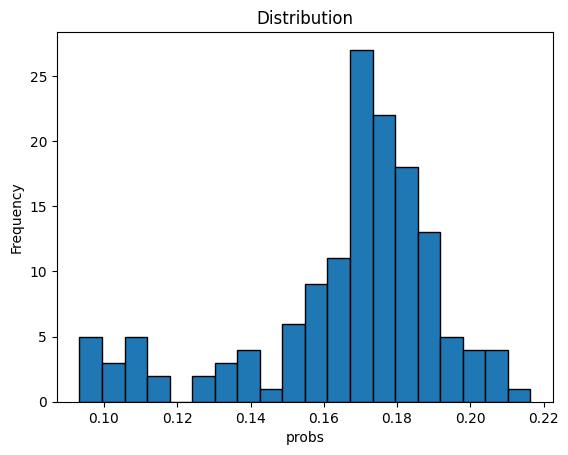

In [20]:
plt.hist([probs[0].item() for probs in all_probs], bins = 20, edgecolor='black')
plt.xlabel('probs')
plt.ylabel('Frequency')
plt.title('Distribution')

# lost

In [21]:
file_name = '/jet/home/mjain4/Project/seqcont_circuits/data/numwords/numwords_prompts_lost.pkl'  #TODO::replace with your path
with open(file_name, 'rb') as file:
    prompts_list = pickle.load(file)

In [22]:
prompts_list = replace_nw_seqtype(prompts_list, sequence_name)

In [23]:
good_prompts, all_probs = get_good_prompts_numerals(model, prompts_list)

In [24]:
#TODO::replace with correct path
with open(f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_lost.pkl', 'wb') as file:
    pickle.dump(good_prompts, file)

Text(0.5, 1.0, 'Distribution')

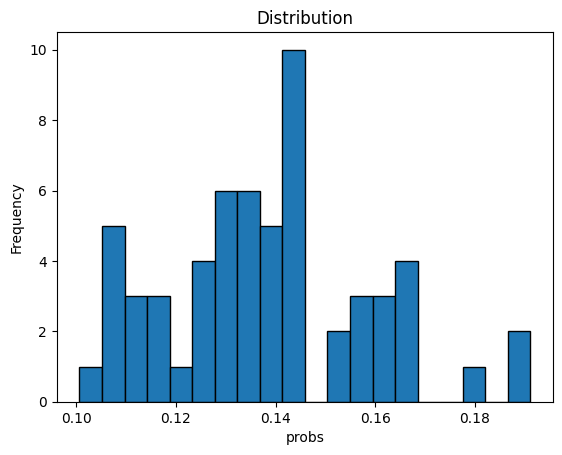

In [25]:
plt.hist([probs[0].item() for probs in all_probs], bins = 20, edgecolor='black')
plt.xlabel('probs')
plt.ylabel('Frequency')
plt.title('Distribution')

# done

In [26]:
file_name = '/jet/home/mjain4/Project/seqcont_circuits/data/numwords/numwords_prompts_done.pkl' #TODO::replace with correct path
with open(file_name, 'rb') as file:
    prompts_list = pickle.load(file)

In [27]:
prompts_list = replace_nw_seqtype(prompts_list, sequence_name)

In [28]:
good_prompts, all_probs = get_good_prompts_numerals(model, prompts_list)

In [37]:
# only run if the text doesn't have "___ done in ___". I ran into the issue where the text was instead "___ d2 in ___"
for prompt in good_prompts:
    text = prompt['text']
    corrected_text = text.replace("d1", "done")
    prompt['text'] = corrected_text

In [38]:
#TODO::replace with correct path
with open(f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_done.pkl', 'wb') as file:
    pickle.dump(good_prompts, file)

Text(0.5, 1.0, 'Distribution')

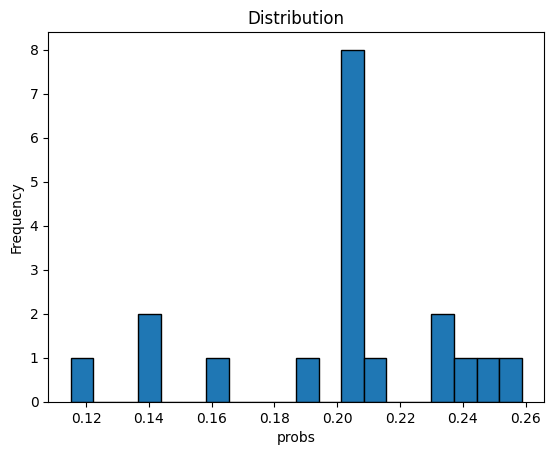

In [39]:
plt.hist([probs[0].item() for probs in all_probs], bins = 20, edgecolor='black')
plt.xlabel('probs')
plt.ylabel('Frequency')
plt.title('Distribution')

In [41]:
#TODO::replace with correct path for all 3
file_name = f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_done.pkl'
with open(file_name, 'rb') as file:
    prompts_list_done = pickle.load(file)
    
file_name = f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_lost.pkl'
with open(file_name, 'rb') as file:
    prompts_list_lost = pickle.load(file)
    
file_name = f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_names.pkl'
with open(file_name, 'rb') as file:
    prompts_list_names = pickle.load(file)

In [42]:
# Truncate prompt lists to match size of smallest prompt list
min_len = min(len(prompts_list_done), len(prompts_list_lost), len(prompts_list_names))
prompts_list_done = prompts_list_done[:min_len]
prompts_list_lost = prompts_list_lost[:min_len]
prompts_list_names = prompts_list_names[:min_len]

In [44]:
output_done = generate_prompts_list_corr(prompts_list_done)
output_lost = generate_prompts_list_corr(prompts_list_lost)
output_names = generate_prompts_list_corr(prompts_list_names)

In [45]:
output = []
output.extend(output_done)
output.extend(output_lost)
output.extend(output_names)

In [25]:
# save random prompts
with open(f'/jet/home/mjain4/Project/seqcont_circuits/data/{sequence_name}/randDS_{sequence_name}.pkl', 'wb') as file:
    pickle.dump(output, file)

In [26]:
# resave names, done, and list prompts using the truncated lists
with open(f'/jet/home/mjain4/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_done.pkl', 'wb') as file:
    pickle.dump(prompts_list_done, file)
with open(f'/jet/home/mjain4/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_lost.pkl', 'wb') as file:
    pickle.dump(prompts_list_lost, file)
with open(f'/jet/home/mjain4/seqcont_circuits/data/{sequence_name}/{sequence_name}_prompts_names.pkl', 'wb') as file:
    pickle.dump(prompts_list_names, file)